In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('globalcount_data.csv')

In [3]:
df

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,...,barrier_person_immigrant_and_refugee_rights,barrier_person_indigenous_andor_roma_rights,barrier_person_LGBTQI+_rights,barrier_racial_equity,barrier_person_reproductive_freedom_and_bodily_autonomy,barrier_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health,barrier_city_civil_rights_and_freedoms,barrier_city_disability_rights,barrier_city_economic_and_workers_rights,barrier_city_education_and_youth_empowerment,barrier_city_ending_violence_harassment_and_abuse,barrier_city_environmental_justice,barrier_city_immigrant_and_refugee_rights,barrier_city_indigenous_andor_roma_rights,barrier_city_LGBTQI+_rights,barrier_city_racial_equity,barrier_city_reproductive_freedom_and_bodily_autonomy,barrier_city_sexual_reproductive_and_parental_health,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,1,0,0,0,0,...,Political,NaN,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,0,0,0,1,0,...,NaN,Cultural/Social,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Economic,NaN,Cultural/Social,NaN,NaN,NaN,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45 to 54,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,Cultural/Social,NaN,0,0,1,0,0,0,1,0,0,1,0,0,NaN,NaN,Political,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,NaN,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,0,0,1,0,0,0,...,Political,NaN,Political,NaN,NaN,NaN,1,0,0,0,0,0,1,0,0,1,0,0,Education,NaN,NaN,NaN,NaN,NaN,Political,NaN,NaN,Education,NaN,NaN,SINGA,SINGA,NaN,More women in high political positions. Ac

In [4]:
df.shape

(24051, 92)

In [5]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
df.isna().sum()

row_id                      0
unique_id                   0
survey_type                 0
iso3166                     5
surveydate                  0
                        ...  
npo_2_tr                17054
npo_3_tr                18043
progress_10_years_tr    12625
language                11097
langauge_score          11097
Length: 92, dtype: int64

In [96]:
response_per_country = df.groupby('country_of_residence')['unique_id'].count().sort_values(ascending = False).reset_index()
response_per_country.head(20)

,country_of_residence,unique_id
0,Switzerland,2335
1,Belarus,2151
2,Russian Federation,1913
3,Ukraine,1338
4,Kazakhstan,1320
5,United States of America,992
6,Kenya,946
7,Zimbabwe,929
8,Liberia,846
9,Nigeria,837


In [98]:
#the most critical issues that survey respondents face globally 
df.iloc[:,34:71].sum().sort_values(ascending = False)

issue_person_ending_violence_harassment_and_abuse        15199
issue_person_education_and_youth_empowerment              9307
issue_person_civil_rights_and_freedoms                    7047
issue_person_environmental_justice                        5580
issue_person_economic_and_workers_rights                  5203
issue_person_racial_equity                                4692
issue_city_ending_violence_harassment_and_abuse           4193
issue_person_sexual_reproductive_and_parental_health      3864
issue_city_education_and_youth_empowerment                3046
issue_city_economic_and_workers_rights                    3009
issue_person_disability_rights                            2494
issue_person_reproductive_freedom_and_bodily_autonomy     2417
issue_person_LGBTQI+_rights                               2357
issue_city_civil_rights_and_freedoms                      2289
issue_city_environmental_justice                          2240
issue_person_immigrant_and_refugee_rights              

Personal issues = violence, education & civil rights
City issues = violence,education & worker rights 

Other issues for people who face violence & harassment : education & civil rights & freedom

In [7]:
#second most critical issues that survey respondents face with harassment & abuse
df.iloc[:,34:71][df.issue_person_ending_violence_harassment_and_abuse == 1].sum().sort_values(ascending = False)

issue_person_ending_violence_harassment_and_abuse        15199
issue_person_education_and_youth_empowerment              5906
issue_person_civil_rights_and_freedoms                    3920
issue_city_ending_violence_harassment_and_abuse           3446
issue_person_environmental_justice                        2968
issue_person_racial_equity                                2932
issue_person_sexual_reproductive_and_parental_health      2606
issue_person_economic_and_workers_rights                  2595
issue_city_education_and_youth_empowerment                2166
issue_city_economic_and_workers_rights                    1921
issue_person_disability_rights                            1564
issue_person_LGBTQI+_rights                               1519
issue_city_civil_rights_and_freedoms                      1511
issue_person_reproductive_freedom_and_bodily_autonomy     1489
issue_city_environmental_justice                          1368
issue_person_immigrant_and_refugee_rights              

In [28]:
#the most critical issues that survey respondents face by country
df_issues = pd.concat([df.iloc[:,7], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_issues = df_issues.groupby('country_of_residence').sum().reset_index(0)
df_issues[df_issues.country_of_residence == 'Switzerland'].transpose()

,133
country_of_residence,Switzerland
issue_person_disability_rights,172
issue_person_economic_and_workers_rights,377
issue_person_education_and_youth_empowerment,358
issue_person_ending_violence_harassment_and_abuse,1518
issue_person_environmental_justice,1367
issue_person_immigrant_and_refugee_rights,506
issue_person_indigenous_andor_roma_rights,163
issue_person_LGBTQI+_rights,300
issue_person_racial_equity,1398


Top 3 personal issues in switzerland = violence,racial equity & environmental justice
City = environmental, worker rights & refugee rights 

In [29]:
df_issues[df_issues.country_of_residence == 'Belarus'].transpose()

,15
country_of_residence,Belarus
issue_person_disability_rights,213
issue_person_economic_and_workers_rights,330
issue_person_education_and_youth_empowerment,556
issue_person_ending_violence_harassment_and_abuse,1330
issue_person_environmental_justice,555
issue_person_immigrant_and_refugee_rights,36
issue_person_indigenous_andor_roma_rights,21
issue_person_LGBTQI+_rights,353
issue_person_racial_equity,292


Belarus 
Personal - violence, environmental & education

In [32]:
#Responses by gender
df_gender = df.iloc[:,8:17]
df_gender.sum().sort_values(ascending = False)

woman                            17456
cisgender_woman                   1480
man                               1093
gender_choose_not_to_identify      457
non_conforming_or_non_binary       317
gender_not_listed                  160
transgender_woman                  157
cisgender_man                      102
transgender_man                     94
dtype: int64

In [103]:
#the most critical issues that survey respondents face by cisgender_man
df_cisgender_man = pd.concat([df.iloc[:,9], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_cisgender_man[df_cisgender_man.cisgender_man == 1].sum().sort_values(ascending = False)

cisgender_man                                            102
issue_person_ending_violence_harassment_and_abuse         52
issue_person_environmental_justice                        34
issue_person_education_and_youth_empowerment              33
issue_city_ending_violence_harassment_and_abuse           33
issue_person_racial_equity                                31
issue_city_environmental_justice                          23
issue_city_economic_and_workers_rights                    22
issue_person_economic_and_workers_rights                  21
issue_city_racial_equity                                  18
issue_person_immigrant_and_refugee_rights                 18
issue_person_sexual_reproductive_and_parental_health      17
issue_city_immigrant_and_refugee_rights                   17
issue_city_education_and_youth_empowerment                15
issue_city_LGBTQI+_rights                                 11
issue_person_LGBTQI+_rights                               10
issue_city_sexual_reprod

In [67]:
def gender(type,position):
  return
  x = pd.concat([df.iloc[:,position], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
  x[x.type == 1].sum().sort_values(ascending = False)


In [36]:
#the most critical issues that survey respondents face by cisgender_woman
df_cisgender_woman = pd.concat([df.iloc[:,10], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_cisgender_woman[df_cisgender_woman.cisgender_woman == 1].sum().sort_values(ascending = False)

cisgender_woman                                          1480
issue_person_ending_violence_harassment_and_abuse         940
issue_city_ending_violence_harassment_and_abuse           443
issue_person_environmental_justice                        431
issue_person_reproductive_freedom_and_bodily_autonomy     428
issue_person_LGBTQI+_rights                               402
issue_person_racial_equity                                331
issue_city_economic_and_workers_rights                    318
issue_person_education_and_youth_empowerment              313
issue_person_sexual_reproductive_and_parental_health      303
issue_city_racial_equity                                  289
issue_city_environmental_justice                          255
issue_person_economic_and_workers_rights                  247
issue_city_immigrant_and_refugee_rights                   243
issue_city_education_and_youth_empowerment                223
issue_city_LGBTQI+_rights                                 221
issue_ci

In [39]:
df_cisgender_woman = df_cisgender_woman[df_cisgender_woman.cisgender_woman == 1]
df_cisgender_woman[(df_cisgender_woman.issue_person_ending_violence_harassment_and_abuse == 1)].sum().sort_values(ascending = False)

cisgender_woman                                          940
issue_person_ending_violence_harassment_and_abuse        940
issue_city_ending_violence_harassment_and_abuse          325
issue_person_reproductive_freedom_and_bodily_autonomy    255
issue_person_LGBTQI+_rights                              251
issue_person_environmental_justice                       208
issue_city_economic_and_workers_rights                   180
issue_person_education_and_youth_empowerment             179
issue_person_sexual_reproductive_and_parental_health     179
issue_person_racial_equity                               178
issue_city_racial_equity                                 167
issue_city_LGBTQI+_rights                                151
issue_city_environmental_justice                         145
issue_city_education_and_youth_empowerment               143
issue_city_immigrant_and_refugee_rights                  136
issue_person_economic_and_workers_rights                 110
issue_city_disability_ri

cisgender woman personal issues: abuse, body autonomy & LGBTQI rights 

In [105]:
#the most critical issues that survey respondents face by non_conforming_or_non_binary
df_non_binary = pd.concat([df.iloc[:,11], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_non_binary[df_non_binary.non_conforming_or_non_binary == 1].sum().sort_values(ascending = False)

non_conforming_or_non_binary                             317
issue_person_ending_violence_harassment_and_abuse        193
issue_person_LGBTQI+_rights                              147
issue_city_ending_violence_harassment_and_abuse           92
issue_person_environmental_justice                        82
issue_person_education_and_youth_empowerment              73
issue_city_economic_and_workers_rights                    63
issue_person_reproductive_freedom_and_bodily_autonomy     62
issue_person_racial_equity                                55
issue_city_education_and_youth_empowerment                49
issue_person_economic_and_workers_rights                  47
issue_city_environmental_justice                          47
issue_person_sexual_reproductive_and_parental_health      46
issue_city_LGBTQI+_rights                                 41
issue_city_immigrant_and_refugee_rights                   40
issue_city_racial_equity                                  39
issue_person_disability_

In [106]:
#the most critical issues that survey respondents face by gender_choose_not_to_identify
df_choose_not_to_identify = pd.concat([df.iloc[:,12], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_choose_not_to_identify[df_choose_not_to_identify .gender_choose_not_to_identify == 1].sum().sort_values(ascending = False)

gender_choose_not_to_identify                            457
issue_person_ending_violence_harassment_and_abuse        242
issue_person_education_and_youth_empowerment             187
issue_person_racial_equity                                95
issue_person_economic_and_workers_rights                  93
issue_person_environmental_justice                        83
issue_city_ending_violence_harassment_and_abuse           78
issue_city_economic_and_workers_rights                    65
issue_city_education_and_youth_empowerment                60
issue_person_sexual_reproductive_and_parental_health      59
issue_person_disability_rights                            58
issue_person_reproductive_freedom_and_bodily_autonomy     45
issue_person_LGBTQI+_rights                               44
issue_city_racial_equity                                  39
issue_city_environmental_justice                          35
issue_person_immigrant_and_refugee_rights                 31
issue_city_immigrant_and

In [107]:
#the most critical issues that survey respondents face by man
df_man = pd.concat([df.iloc[:,13], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_man[df_man.man == 1].sum().sort_values(ascending = False)

man                                                      1093
issue_person_ending_violence_harassment_and_abuse         587
issue_person_education_and_youth_empowerment              365
issue_person_racial_equity                                336
issue_person_environmental_justice                        334
issue_city_economic_and_workers_rights                    247
issue_city_environmental_justice                          244
issue_city_ending_violence_harassment_and_abuse           236
issue_city_education_and_youth_empowerment                175
issue_city_immigrant_and_refugee_rights                   174
issue_person_economic_and_workers_rights                  158
issue_city_racial_equity                                  146
issue_person_immigrant_and_refugee_rights                 120
issue_person_sexual_reproductive_and_parental_health      107
issue_person_disability_rights                             76
issue_city_disability_rights                               59
issue_pe

In [109]:
#the most critical issues that survey respondents face by transgender_man
df_transman = pd.concat([df.iloc[:,14], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_transman[df_transman.transgender_man == 1].sum().sort_values(ascending = False)

transgender_man                                          94
issue_person_ending_violence_harassment_and_abuse        48
issue_person_education_and_youth_empowerment             43
issue_person_environmental_justice                       21
issue_person_sexual_reproductive_and_parental_health     19
issue_person_LGBTQI+_rights                              16
issue_city_ending_violence_harassment_and_abuse          16
issue_city_education_and_youth_empowerment               15
issue_person_economic_and_workers_rights                 15
issue_person_racial_equity                               14
issue_person_disability_rights                            9
issue_city_environmental_justice                          9
issue_city_economic_and_workers_rights                    8
issue_person_immigrant_and_refugee_rights                 7
issue_person_reproductive_freedom_and_bodily_autonomy     7
issue_city_LGBTQI+_rights                                 6
issue_city_sexual_reproductive_and_paren

In [41]:
#the most critical issues that survey respondents face by woman
df_woman = pd.concat([df.iloc[:,16], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_woman[df_woman.woman == 1].sum().sort_values(ascending = False)

woman                                                    17456
issue_person_ending_violence_harassment_and_abuse        11009
issue_person_education_and_youth_empowerment              6955
issue_person_economic_and_workers_rights                  3829
issue_person_environmental_justice                        3744
issue_city_ending_violence_harassment_and_abuse           2968
issue_person_racial_equity                                2901
issue_person_sexual_reproductive_and_parental_health      2794
issue_city_education_and_youth_empowerment                2213
issue_city_economic_and_workers_rights                    2139
issue_person_disability_rights                            1743
issue_person_reproductive_freedom_and_bodily_autonomy     1680
issue_city_environmental_justice                          1524
issue_person_LGBTQI+_rights                               1517
issue_person_immigrant_and_refugee_rights                 1365
issue_city_racial_equity                               

In [42]:
df_woman = df_woman[df_woman.woman == 1]
df_woman[df_woman.issue_person_ending_violence_harassment_and_abuse == 1].sum().sort_values(ascending = False)

woman                                                    11009
issue_person_ending_violence_harassment_and_abuse        11009
issue_person_education_and_youth_empowerment              4388
issue_city_ending_violence_harassment_and_abuse           2458
issue_person_environmental_justice                        2025
issue_person_sexual_reproductive_and_parental_health      1922
issue_person_economic_and_workers_rights                  1916
issue_person_racial_equity                                1894
issue_city_education_and_youth_empowerment                1588
issue_city_economic_and_workers_rights                    1399
issue_person_disability_rights                            1108
issue_person_reproductive_freedom_and_bodily_autonomy     1047
issue_person_LGBTQI+_rights                               1032
issue_city_environmental_justice                           957
issue_person_immigrant_and_refugee_rights                  825
issue_city_racial_equity                               

In [110]:
#Responses by race
df_race = df.iloc[:,18:34]
df_race.sum().sort_values(ascending = False)

white                                   6833
black_or_of_african_descent             4760
asian                                   2073
indigenous                              1791
choose_not_to_identify                  1698
biracial_or_mixed                       1091
hispanic_or_latinx                      1083
north_african                            368
middle_eastern                           285
south_asian                              185
indigenous_central_or_south_american     177
southeast_asian                           97
native_american                           96
pacific_islander                          59
native_hawaiian                           48
dtype: int64

In [112]:
#the most critical issues that survey respondents face by asian
df_asian = pd.concat([df.iloc[:,18], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_asian[df_asian.asian == 1].sum().sort_values(ascending = False)

asian                                                    2073
issue_person_ending_violence_harassment_and_abuse        1347
issue_person_education_and_youth_empowerment              766
issue_person_economic_and_workers_rights                  328
issue_person_environmental_justice                        327
issue_person_racial_equity                                242
issue_person_sexual_reproductive_and_parental_health      216
issue_person_LGBTQI+_rights                               156
issue_person_reproductive_freedom_and_bodily_autonomy     144
issue_person_immigrant_and_refugee_rights                 133
issue_person_disability_rights                            124
issue_city_ending_violence_harassment_and_abuse           120
issue_city_economic_and_workers_rights                     87
issue_city_education_and_youth_empowerment                 76
issue_city_environmental_justice                           56
issue_city_racial_equity                                   55
issue_ci

In [113]:
#the most critical issues that survey respondents face by biracial_or_mixed
df_biracial= pd.concat([df.iloc[:,19], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_biracial[df_biracial.biracial_or_mixed == 1].sum().sort_values(ascending = False)

biracial_or_mixed                                        1091
issue_person_ending_violence_harassment_and_abuse         700
issue_person_education_and_youth_empowerment              349
issue_person_environmental_justice                        303
issue_person_racial_equity                                250
issue_person_economic_and_workers_rights                  211
issue_person_LGBTQI+_rights                               207
issue_city_ending_violence_harassment_and_abuse           198
issue_city_economic_and_workers_rights                    174
issue_person_reproductive_freedom_and_bodily_autonomy     163
issue_city_education_and_youth_empowerment                148
issue_person_sexual_reproductive_and_parental_health      142
issue_person_disability_rights                            113
issue_city_environmental_justice                          112
issue_city_racial_equity                                   87
issue_city_immigrant_and_refugee_rights                    79
issue_ci

In [114]:
#the most critical issues that survey respondents face by black_or_of_african_descent
df_black= pd.concat([df.iloc[:,20], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_black[df_black.black_or_of_african_descent == 1].sum().sort_values(ascending = False)

black_or_of_african_descent                              4760
issue_person_ending_violence_harassment_and_abuse        3349
issue_person_education_and_youth_empowerment             2896
issue_person_sexual_reproductive_and_parental_health     1151
issue_city_ending_violence_harassment_and_abuse          1008
issue_city_education_and_youth_empowerment                888
issue_person_economic_and_workers_rights                  882
issue_person_racial_equity                                790
issue_person_disability_rights                            503
issue_city_sexual_reproductive_and_parental_health        429
issue_person_environmental_justice                        424
issue_city_economic_and_workers_rights                    397
issue_person_immigrant_and_refugee_rights                 348
issue_person_reproductive_freedom_and_bodily_autonomy     201
issue_person_LGBTQI+_rights                               174
issue_city_disability_rights                              154
issue_ci

In [115]:
#the most critical issues that survey respondents face by hispanic_or_latinx
df_hispanic= pd.concat([df.iloc[:,21], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_hispanic[df_hispanic.hispanic_or_latinx == 1].sum().sort_values(ascending = False)

hispanic_or_latinx                                       1083
issue_person_ending_violence_harassment_and_abuse         696
issue_person_economic_and_workers_rights                  400
issue_person_education_and_youth_empowerment              347
issue_city_ending_violence_harassment_and_abuse           252
issue_person_immigrant_and_refugee_rights                 230
issue_person_environmental_justice                        169
issue_city_economic_and_workers_rights                    153
issue_person_sexual_reproductive_and_parental_health      151
issue_person_racial_equity                                137
issue_person_disability_rights                            134
issue_city_education_and_youth_empowerment                126
issue_city_immigrant_and_refugee_rights                    78
issue_person_reproductive_freedom_and_bodily_autonomy      73
issue_person_LGBTQI+_rights                                69
issue_city_racial_equity                                   67
issue_ci

In [116]:
#the most critical issues that survey respondents face by choose_not_to_identify
df_choose_not_to_identifyrace= pd.concat([df.iloc[:,22], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_choose_not_to_identifyrace[df_choose_not_to_identifyrace.choose_not_to_identify == 1].sum().sort_values(ascending = False)

choose_not_to_identify                                   1698
issue_person_ending_violence_harassment_and_abuse         970
issue_person_education_and_youth_empowerment              672
issue_person_economic_and_workers_rights                  385
issue_person_environmental_justice                        349
issue_person_racial_equity                                265
issue_city_ending_violence_harassment_and_abuse           243
issue_city_economic_and_workers_rights                    203
issue_person_sexual_reproductive_and_parental_health      202
issue_person_disability_rights                            190
issue_city_education_and_youth_empowerment                177
issue_city_environmental_justice                          147
issue_person_immigrant_and_refugee_rights                 110
issue_person_reproductive_freedom_and_bodily_autonomy     108
issue_person_LGBTQI+_rights                               105
issue_city_racial_equity                                   91
issue_ci

In [117]:
#the most critical issues that survey respondents face by indigenous
df_indigenous= pd.concat([df.iloc[:,23], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_indigenous[df_indigenous.indigenous == 1].sum().sort_values(ascending = False)

indigenous                                               1791
issue_person_ending_violence_harassment_and_abuse        1003
issue_person_education_and_youth_empowerment              579
issue_person_environmental_justice                        579
issue_person_racial_equity                                429
issue_person_economic_and_workers_rights                  391
issue_city_environmental_justice                          342
issue_city_economic_and_workers_rights                    314
issue_city_ending_violence_harassment_and_abuse           265
issue_city_immigrant_and_refugee_rights                   263
issue_city_education_and_youth_empowerment                213
issue_city_racial_equity                                  178
issue_person_immigrant_and_refugee_rights                 164
issue_person_disability_rights                            154
issue_person_sexual_reproductive_and_parental_health      152
issue_person_indigenous_andor_roma_rights                 113
issue_pe

In [43]:
#the most critical issues that survey respondents face by age
df_age = pd.concat([df.iloc[:,33], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_age.groupby('age').sum().head()

,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_LGBTQI+_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health
age,,,,,,,,,,,,,,,,,,,,,,
18 to 24,493,854,2433,4049,1170,381,95,1046,1001,740,1029,309,572,677,967,439,235,60,367,258,136,258
25 to 34,519,1103,2305,3522,1025,431,111,423,871,634,1114,237,659,737,1008,393,370,107,253,420,118,323
35 to 44,325,814,1218,1878,652,268,81,161,538,245,521,100,453,417,550,288,240,63,120,267,59,158
45 to 54,275,615,813,1220,495,194,61,95,406,137,220,89,329,285,366,239,201,33,83,191,35,68
55 to 64,198,535,508,915,572,162,84,84,368,92,118,66,335,200,325,297,192,32,59,191,30,43


In [55]:
df_age = pd.concat([df.iloc[:,33], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1).groupby('age').sum().head().reset_index(0)
df_age.transpose()

,0,1,2,3,4
age,18 to 24,25 to 34,35 to 44,45 to 54,55 to 64
issue_person_disability_rights,493,519,325,275,198
issue_person_economic_and_workers_rights,854,1103,814,615,535
issue_person_education_and_youth_empowerment,2433,2305,1218,813,508
issue_person_ending_violence_harassment_and_abuse,4049,3522,1878,1220,915
issue_person_environmental_justice,1170,1025,652,495,572
issue_person_immigrant_and_refugee_rights,381,431,268,194,162
issue_person_indigenous_andor_roma_rights,95,111,81,61,84
issue_person_LGBTQI+_rights,1046,423,161,95,84
issue_person_racial_equity,1001,871,538,406,368


In [152]:
#Responses by black transgender
response_black_trans = pd.concat([df.iloc[:,14],df.iloc[:,20], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
response_black_trans[response_black_trans.black_or_of_african_descent ==1].groupby('black_or_of_african_descent').sum().transpose()

black_or_of_african_descent,1
transgender_man,46
issue_person_disability_rights,503
issue_person_economic_and_workers_rights,882
issue_person_education_and_youth_empowerment,2896
issue_person_ending_violence_harassment_and_abuse,3349
issue_person_environmental_justice,424
issue_person_immigrant_and_refugee_rights,348
issue_person_indigenous_andor_roma_rights,83
issue_person_LGBTQI+_rights,174
issue_person_racial_equity,790


In [21]:
#issue_person_civil_rights_and_freedoms
df_civil_rights = pd.concat([df.iloc[:,34], df.iloc[:,10:34]], axis=1)
df_civil_rights[df_civil_rights.issue_person_civil_rights_and_freedoms == 1].sum().sort_values(ascending=False)

issue_person_civil_rights_and_freedoms    7047
woman                                     5232
white                                     2925
black_or_of_african_descent                644
asian                                      579
indigenous                                 549
cisgender_woman                            547
choose_not_to_identify                     434
racial_identity_not_listed                 418
biracial_or_mixed                          413
man                                        267
hispanic_or_latinx                         183
gender_choose_not_to_identify              101
non_conforming_or_non_binary               100
middle_eastern                              78
north_african                               77
south_asian                                 41
transgender_woman                           35
southeast_asian                             23
indigenous_central_or_south_american        21
native_american                             19
transgender_m

In [22]:
#issue_person_disability_rights
df_disability = pd.concat([df.iloc[:,35], df.iloc[:,10:34]], axis=1)
df_disability[df_disability.issue_person_disability_rights == 1].sum().sort_values(ascending=False)

issue_person_disability_rights          2494
woman                                   1743
white                                    678
black_or_of_african_descent              503
choose_not_to_identify                   190
indigenous                               154
hispanic_or_latinx                       134
asian                                    124
cisgender_woman                          116
biracial_or_mixed                        113
racial_identity_not_listed               111
man                                       76
gender_choose_not_to_identify             58
north_african                             50
non_conforming_or_non_binary              31
indigenous_central_or_south_american      19
middle_eastern                            16
transgender_woman                         16
south_asian                               13
southeast_asian                           11
native_american                           11
transgender_man                            9
pacific_is

In [23]:
#issue_person_economic_and_workers_rights
df_workers_right = pd.concat([df.iloc[:,36], df.iloc[:,10:34]], axis=1)
df_workers_right[df_workers_right.issue_person_economic_and_workers_rights== 1].sum().sort_values(ascending=False)

issue_person_economic_and_workers_rights    5203
woman                                       3829
white                                       1469
black_or_of_african_descent                  882
hispanic_or_latinx                           400
indigenous                                   391
choose_not_to_identify                       385
asian                                        328
racial_identity_not_listed                   248
cisgender_woman                              247
biracial_or_mixed                            211
man                                          158
gender_choose_not_to_identify                 93
north_african                                 66
indigenous_central_or_south_american          58
middle_eastern                                49
non_conforming_or_non_binary                  47
south_asian                                   35
transgender_woman                             32
southeast_asian                               21
native_american     

In [25]:
#issue_person_education_and_youth_empowerment
df_youth_empower= pd.concat([df.iloc[:,37], df.iloc[:,10:34]], axis=1)
df_youth_empower[df_youth_empower.issue_person_education_and_youth_empowerment== 1].sum().sort_values(ascending=False)

issue_person_education_and_youth_empowerment    9307
woman                                           6955
black_or_of_african_descent                     2896
white                                           1725
asian                                            766
choose_not_to_identify                           672
indigenous                                       579
racial_identity_not_listed                       368
man                                              365
biracial_or_mixed                                349
hispanic_or_latinx                               347
cisgender_woman                                  313
north_african                                    201
gender_choose_not_to_identify                    187
middle_eastern                                   123
indigenous_central_or_south_american              86
transgender_woman                                 82
south_asian                                       81
non_conforming_or_non_binary                  

In [44]:
#race & worker equity
race_worker_equity = df[(df['issue_person_economic_and_workers_rights'] == 1) & (df['issue_person_racial_equity'] == 1)]
(race_worker_equity.unique_id.count()*100/df.unique_id.count()).round(2)

2.15

In [45]:
#race, worker equity & Ending Violence, Harassment, and Abuse
race_worker_violence = df[(df['issue_person_economic_and_workers_rights'] == 1) & (df['issue_person_racial_equity'] == 1) & (df['issue_person_ending_violence_harassment_and_abuse'] == 1) ]
(race_worker_violence.unique_id.count()*100/df.unique_id.count()).round(2)

0.84

In [46]:
#issue_person_ending_violence_harassment_and_abuse & Reproductive Freedom and Bodily Autonomy
violence_reprodutive_free = df[(df['issue_person_reproductive_freedom_and_bodily_autonomy'] == 1) & (df['issue_person_ending_violence_harassment_and_abuse'] == 1) ]
(violence_reprodutive_free.unique_id.count()*100/df.unique_id.count()).round(2)

6.19

In [47]:
#issue_person_LGBTQI+_rights & issue_person_reproductive_freedom_and_bodily_autonomy
LGBTQI_autonomy = df[(df['issue_person_reproductive_freedom_and_bodily_autonomy'] == 1) & (df['issue_person_LGBTQI+_rights'] == 1)]
(LGBTQI_autonomy.unique_id.count()*100/df.unique_id.count()).round(2)

1.58

In [48]:
#issue_person_civil_rights_and_freedoms & issue_person_indigenous_andor_roma_rights
civil_rights_indigenous = df[(df['issue_person_civil_rights_and_freedoms'] == 1) & (df['issue_person_indigenous_andor_roma_rights'] == 1) & (df['issue_person_ending_violence_harassment_and_abuse'] == 1) ]
(civil_rights_indigenous.unique_id.count()*100/df.unique_id.count()).round(2)

0.14

In [49]:
#issue_person_education_and_youth_empowerment & issue_person_environmental_justice
y = df[(df['issue_person_education_and_youth_empowerment'] == 1) & (df['issue_person_environmental_justice'] == 1) & (df['issue_person_ending_violence_harassment_and_abuse'] == 1) ]
(y.unique_id.count()*100/df.unique_id.count()).round(2)

2.42

In [74]:
df.groupby('barrier_person_ending_violence_harassment_and_abuse').count().unique_id

barrier_person_ending_violence_harassment_and_abuse
Cultural/Social    6713
Economic            688
Education          1518
Political          3024
Technological       138
Name: unique_id, dtype: int64

In [75]:
df.groupby('barrier_person_reproductive_freedom_and_bodily_autonomy').count().unique_id

barrier_person_reproductive_freedom_and_bodily_autonomy
Cultural/Social    1026
Economic             62
Education           266
Political           660
Technological        20
Name: unique_id, dtype: int64

In [78]:
df[df.transgender_man == 1].groupby('barrier_person_ending_violence_harassment_and_abuse').count().unique_id

barrier_person_ending_violence_harassment_and_abuse
Cultural/Social     8
Economic            5
Education           4
Political          12
Name: unique_id, dtype: int64

In [79]:
df[(df['woman'] == 1) & (df['hispanic_or_latinx'] == 1)].groupby('barrier_racial_equity').count().unique_id

barrier_racial_equity
Cultural/Social    62
Economic           11
Education          23
Political          17
Name: unique_id, dtype: int64

In [95]:
df.npo_3_tr.unique()

array([nan, 'ON',
       'Swiss Trade Union Confederation & VPOD Trade Union & SP Party',
       ..., 'Frauenstreik ', 'SP Schweiz', 'Frauenstreikkollektiv'],
      dtype=object)

In [101]:
pip install wordcloud 

In [102]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [120]:
text = df.progress_10_years_tr[3]
text 

'Equality and respect at work, the same AHV for women* as for men, tampon tax abolished, racism and domestic violence are severely punished and women* are better protected. Marriage for all with all rights.'

In [123]:
worldcloud = WordCloud().generate(text)

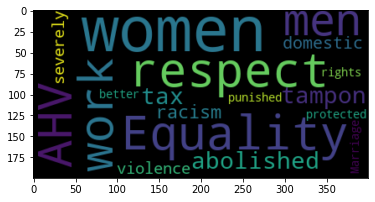

In [125]:
plt.imshow(worldcloud, interpolation='bilinear')